## Import from libraries

In [1]:
pip install google-colab

     |████████████████████████████████| 72 kB 575 kB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 64 kB 1.6 MB/s            
     |████████████████████████████████| 104 kB 5.1 MB/s            
     |████████████████████████████████| 758 kB 7.8 MB/s            
     |████████████████████████████████| 8.0 MB 24.6 MB/s            
     |████████████████████████████████| 10.1 MB 54.0 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 57 kB 4.6 MB/s             
     |████████████████████████████████| 484 kB 57.6 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 245 kB 52.4 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 58 kB 5.0 MB/s             
     |████████████████████████████████| 118 kB 58.6 MB/s            
     |████████████████████████████████| 133 kB 66.5 MB/s            

In [2]:
import cv2           # extração dos pixels;
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


## Extraction of pixels from images

In [3]:
path = '../input/neural-networks-homer-and-bart-classification/homer_bart_1'

In [4]:
directory = '../input/neural-networks-homer-and-bart-classification/homer_bart_1'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]




**THIS IS ANOTHER ALGORITHM WE CAN USE TO MAKE RATINGS THROUGH FEATURE EXTRACTION**

## Feature Extractor

In [5]:
arquivos = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]  

In [6]:
export = 'mouth,pants,shoes,shirt,shorts,sneakers,class\n'  

In [7]:
export

'mouth,pants,shoes,shirt,shorts,sneakers,class\n'

In [8]:
show_images = False
characteristics = []

In [9]:
100 * 200

20000

In [10]:
(2000 / 20000) * 100

10.0

In [11]:
for path_image in files:
  
  try:
    original_image = cv2.imread(path_image)
    (H, W) = original_image.shape[:2]
  except:
    continue

  altered_image = original_image.copy()
  image_features = []
  image_name = os.path.basename(os.path.normpath(path_image))
  mouth = pants = shoes = 0
  shirt = shorts = sneakers = 0

  if image_name.startswith('b'): 
    classe = 0
  else:
    classe = 1

  for height in range(0, H):
    for width in range(0, W):
      
      blue = altered_image.item(height, width, 0)
      green = altered_image.item(height, width, 1)
      red = altered_image.item(height, width, 2)

      if (blue >= 95 and blue <= 140 and green >= 160 and green <= 185 and red >= 175 and red <= 205):
        altered_image[height, width] = [0, 255, 255]
        mouth += 1


      if (blue >= 150 and blue <= 180 and green >= 98 and green <= 120 and red >= 0 and red <= 90):
        altered_image[height, width] = [0, 255, 255]
        pants += 1


      if height > (H / 2):
        if (blue >= 25 and blue <= 45 and green >= 25 and green <= 45 and red >= 25 and red <= 45):
          altered_image[height, width] = [0, 255, 255]
          shoes += 1


      if (blue >= 11 and blue <= 50 and green >= 85 and green <= 105 and red >= 240 and red <= 255):
        altered_image[height, width] = [0, 255, 128]
        shirt += 1


      if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
        altered_image[height, width] = [0, 255, 128]
        shorts += 1


      if height > (H / 2):
        if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
          altered_image[height, width] = [0, 255, 128]
          sneakers += 1

  boca = round((mouth / (H * W)) * 100, 9)
  calca = round((pants / (H * W)) * 100, 9)
  sapato = round((shoes / (H * W)) * 100, 9)
  camisa = round((shirt / (H * W)) * 100, 9)
  calcao = round((shorts / (H * W)) * 100, 9)
  tenis = round((sneakers / (H * W)) * 100, 9)

  image_features.append(mouth)
  image_features.append(pants)
  image_features.append(shoes)
  image_features.append(shirt)
  image_features.append(shorts)
  image_features.append(sneakers)
  image_features.append(classe)

  characteristics.append(image_features)

    
  f = (",".join([str(item) for item in image_features]))
  export += f + '\n'

  if show_images == True:
    altered_image = cv2.cvtColor(altered_image, cv2.COLOR_BGR2RGB)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    figura, im = plt.subplots(1, 2)
    im[0].imshow(original_image)
    im[0].axis('off')
    im[1].imshow(altered_image)
    im[1].axis('off')
    plt.show()


  #cv2_imshow(original_image)
  #print(H, W)
  #print(image_name)

In [12]:
export

'mouth,pants,shoes,shirt,shorts,sneakers,class\n0,0,186,11157,5663,5663,0\n0,0,210,9548,6074,6074,0\n0,0,289,8336,7964,7964,0\n0,726,121,0,0,0,0\n0,0,41,12392,4774,4774,0\n0,0,45,5702,801,801,0\n352,0,28,13671,5789,5789,0\n0,0,135,0,0,0,0\n0,0,329,0,0,0,0\n0,0,218,18226,14290,14290,0\n0,0,198,0,0,0,0\n0,0,43,35005,0,0,0\n4,0,0,8445,7280,7280,0\n3,0,200,0,0,0,0\n0,0,65,16956,0,0,0\n52,0,21,22017,0,0,0\n0,0,232,31759,12952,12952,0\n0,0,272,32591,9887,9887,0\n0,0,96,20958,0,0,0\n0,0,316,10700,8055,8055,0\n0,23,861,16454,0,0,0\n0,0,364,31543,5940,5940,0\n0,0,236,9422,5423,5423,0\n0,0,292,5880,8929,0,0\n0,0,180,0,0,0,0\n0,0,331,46555,29890,29890,0\n0,0,317,15673,21295,21295,0\n0,0,524,0,0,0,0\n49,0,241,0,0,0,0\n0,0,268,38108,25937,25937,0\n0,0,210,0,0,0,0\n0,0,42,5291,0,0,0\n0,0,193,13124,7773,7773,0\n0,0,200,6182,0,0,0\n0,0,79,0,3644,2262,0\n1,0,239,20298,1375,1375,0\n0,0,109,13732,272,272,0\n99,0,143,12892,0,0,0\n0,0,52,5906,1382,1382,0\n0,0,110,5492,3279,3279,0\n0,0,121,11020,11759,11759

## Training and testing bases

In [13]:
with open('features.csv', 'w') as file:
  for linha in export:
    file.write(linha)
file.closed

True

In [14]:
dataset = pd.read_csv('features.csv', error_bad_lines = False)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




In [15]:
X = dataset.iloc[:, 0:6].values   
X

array([[    0,     0,   186, 11157,  5663,  5663],
       [    0,     0,   210,  9548,  6074,  6074],
       [    0,     0,   289,  8336,  7964,  7964],
       ...,
       [ 3167,     0,   245,     0,     0,     0],
       [ 2688,     0,    65,     0,     0,     0],
       [ 3225, 51909,   611,     0,     0,     0]])

In [16]:
y = dataset.iloc[:, 6].values  
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [18]:
X_train.shape, y_train.shape

((215, 6), (215,))

In [19]:
X_test.shape, y_test.shape

((54, 6), (54,))

## Construction and training of the neural network

In [20]:
(6 + 2) / 2

4.0

In [21]:
network = tf.keras.Sequential()
network.add(tf.keras.layers.Dense(input_shape = (6,), units = 4, activation='relu'))
network.add(tf.keras.layers.Dense(units=4, activation='relu'))
network.add(tf.keras.layers.Dense(units=4, activation='relu'))
network.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

2021-12-02 23:17:40.142702: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 23:17:40.273845: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 23:17:40.274558: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 23:17:40.275682: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [22]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 28        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [23]:
network.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [24]:
historic = network.fit(X_train, y_train, epochs = 80)

2021-12-02 23:17:43.007845: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/80
7/7 [==============================] - 1s 3ms/step - loss: 677.0502 - accuracy: 0.4186
Epoch 2/80
7/7 [==============================] - 0s 3ms/step - loss: 592.6348 - accuracy: 0.4186
Epoch 3/80
7/7 [==============================] - 0s 3ms/step - loss: 532.8191 - accuracy: 0.4186
Epoch 4/80
7/7 [==============================] - 0s 3ms/step - loss: 476.4842 - accuracy: 0.4186
Epoch 5/80
7/7 [==============================] - 0s 3ms/step - loss: 425.7019 - accuracy: 0.4186
Epoch 6/80
7/7 [==============================] - 0s 3ms/step - loss: 383.3720 - accuracy: 0.4233
Epoch 7/80
7/7 [==============================] - 0s 3ms/step - loss: 346.0025 - accuracy: 0.4279
Epoch 8/80
7/7 [==============================] - 0s 3ms/step - loss: 308.4059 - accuracy: 0.4419
Epoch 9/80
7/7 [==============================] - 0s 3ms/step - loss: 275.8760 - accuracy: 0.4465
Epoch 10/80
7/7 [==============================] - 0s 3ms/step - loss: 246.1245 - accuracy: 0.4465
Epoch 11/80
7/7 [==

## Neural network evaluation

In [25]:
historic.history.keys()

dict_keys(['loss', 'accuracy'])

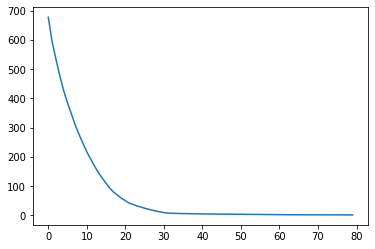

In [26]:
plt.plot(historic.history['loss']);

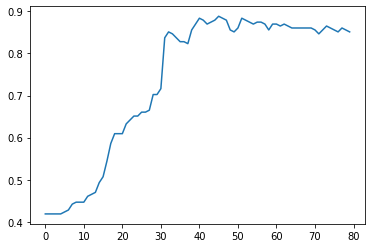

In [27]:
plt.plot(historic.history['accuracy']);

In [28]:
X_test.shape

(54, 6)

In [29]:
forecasts = network(X_test)
forecasts

<tf.Tensor: shape=(54, 1), dtype=float32, numpy=
array([[0.405965  ],
       [1.        ],
       [0.405965  ],
       [0.405965  ],
       [0.405965  ],
       [1.        ],
       [0.405965  ],
       [0.405965  ],
       [0.405965  ],
       [0.405965  ],
       [0.405965  ],
       [1.        ],
       [0.9880206 ],
       [0.405965  ],
       [0.405965  ],
       [1.        ],
       [0.9822286 ],
       [1.        ],
       [0.405965  ],
       [0.405965  ],
       [0.405965  ],
       [1.        ],
       [0.405965  ],
       [0.405965  ],
       [0.405965  ],
       [1.        ],
       [0.9131997 ],
       [0.405965  ],
       [1.        ],
       [1.        ],
       [0.9880846 ],
       [1.        ],
       [1.        ],
       [0.99999964],
       [1.        ],
       [0.9885288 ],
       [0.405965  ],
       [0.405965  ],
       [0.405965  ],
       [0.405965  ],
       [0.9982388 ],
       [0.405965  ],
       [0.405965  ],
       [0.405965  ],
       [0.405965  ],
      

In [30]:
forecasts = forecasts > 0.5
forecasts

<tf.Tensor: shape=(54, 1), dtype=bool, numpy=
array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])>

In [31]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, forecasts)

0.9444444444444444

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, forecasts)
cm

array([[27,  1],
       [ 2, 24]])

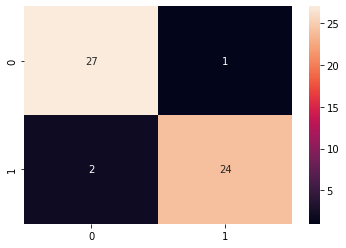

In [34]:
sns.heatmap(cm, annot=True);

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forecasts))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.96      0.92      0.94        26

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.94      0.94      0.94        54



## Upload and rate a single image

In [36]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 28        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [37]:
image_test = X_test[1]
image_test

array([3118, 7169,    0,    0,    0,    0])

In [38]:
image_test.shape

(6,)

In [39]:
image_test = image_test.reshape(1,-1)
image_test.shape

(1, 6)

In [40]:
network.predict(image_test)[0][0]

1.0

In [41]:
if network.predict(image_test)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

Homer


**The case study with the extraction of features has a much better result than just with neural networks.**

https://www.kaggle.com/juniorbueno/neural-networks-simpsons-image-classification

# **If you find this notebook useful, support with an upvote** 👍¶